In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
warnings.simplefilter('ignore')

In [94]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

In [95]:
df = pd.read_csv(r"C:\Users\nicka\Downloads\archive\winemag-data_first150k.csv",sep = ',',index_col=0) #index_col=0 для того чтобы не было
df.sample(10)                                                                                          #столбика unnamed 0

,country,description,designation,points,price,province,region_1,region_2,variety,winery
150127,US,"Earthy and minerally, and very dry, this Chard...",MacBride Vineyard,86,24.0,California,York Mountain,Central Coast,Chardonnay,Stephen's
1288,Portugal,"According to legend, the Baron of Figuiera got...",Barão de Figueira Branco,85,10.0,Beira Interior,NaN,NaN,Siria,Companhia das Quintas
33650,US,"As in the past, Leonetti's 2010 Sangiovese was...",NaN,93,65.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sangiovese,Leonetti Cellar
93137,Italy,"This blend of Merlot, Petit Verdot, Cabernet S...",NaN,90,57.0,Central Italy,Marche,NaN,Red Blend,Il Pollenza
45991,Italy,This vibrant wine discloses aromas of delicate...,NaN,87,20.0,Northeastern Italy,Colli Orientali del Friuli,NaN,Ribolla Gialla,Sirch
80274,France,"Dry and firm, this has tannins and an austere ...",NaN,86,19.0,Bordeaux,Côtes de Bourg,NaN,Bordeaux-style Red Blend,Château Perthus
61910,US,"Firm, with herbal flavors of olive and some in...",NaN,86,36.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Cedergreen Cellars
13695,US,"A nice, rich Cabernet for drinking now. It's v...",R Collection Lot No 3,86,15.0,California,California,California Other,Cabernet Sauvignon,Raymond
137279,Italy,There's a fragrant component to the nose that ...,NaN,87,20.0,Northeastern Italy,Colli Orientali del Friuli,NaN,Friulano,Torre Rosazza
21160,Chile,"Wet, salinic, oceanic and appley on the nose, ...",Classic,87,12.0,Leyda Valley,NaN,NaN,Chardonnay,Leyda


country - страна производства вина  
description - описание вина  
designation - отдел где были собран виноград для вина  
points - очки оценки  
price - цена  
province - провинция или штат откуда вино  
region_1 - где вино настаивалось  
region_2 - где вино настаивалось уточнение  
variety - сорт  
winery - винокурня  

<Axes: >

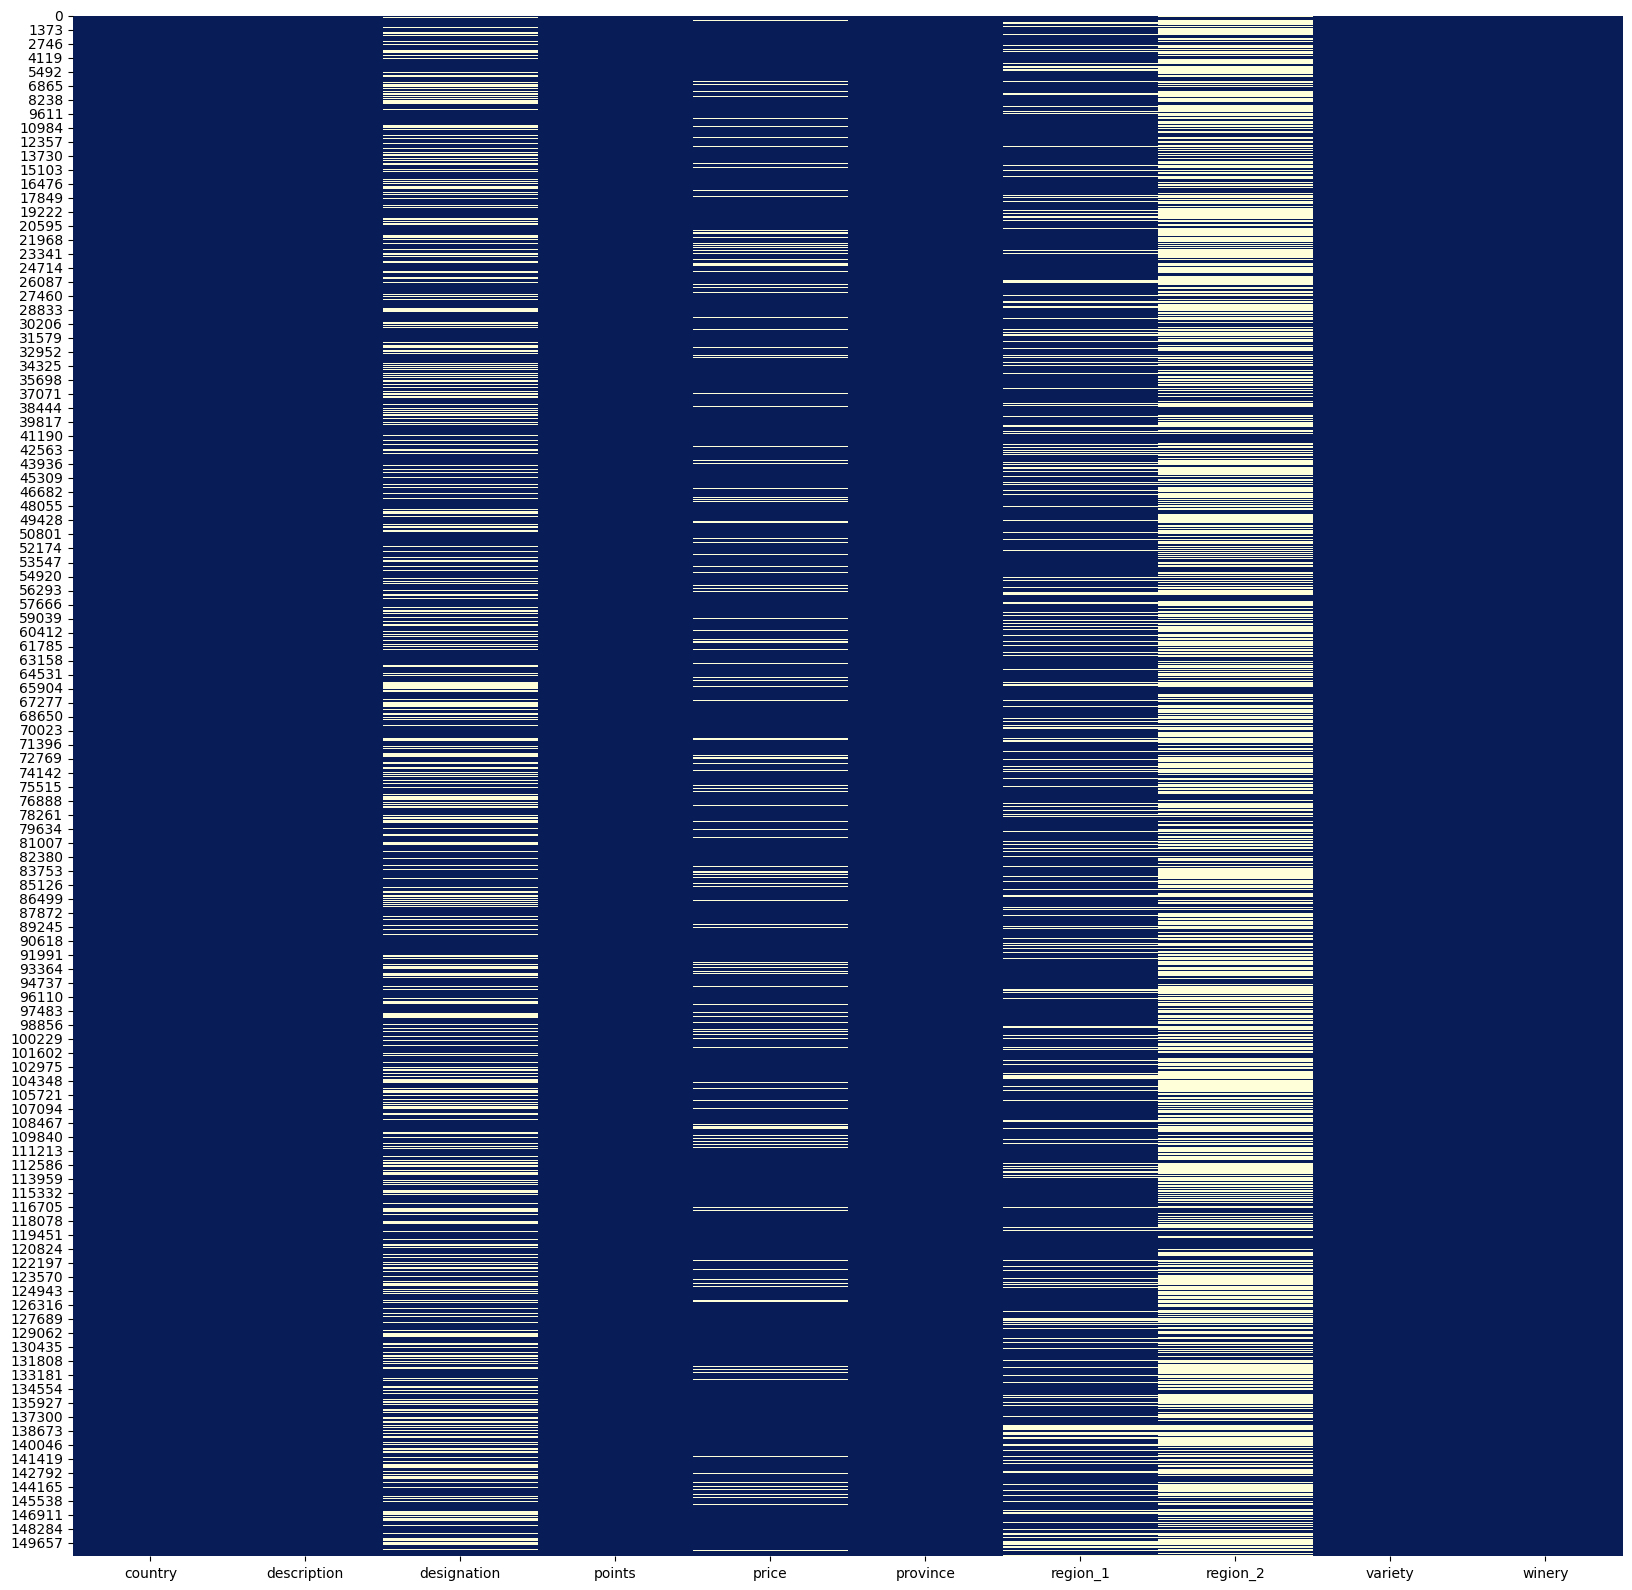

In [96]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [98]:
df.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [99]:
df.isna().sum()/df.shape[0]*100 # процент пустых значений в колонках

country         0.003313
description     0.000000
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
region_2       59.615053
variety         0.000000
winery          0.000000
dtype: float64

Видим что колонку region_2 можно смело удалить т.к. колонка является уточнением места настойки и процент пустых значений в ней > 50% что значит что колонка является не информативной и мало будет влиять на целевую переменную 

Но мы можем соединить эту колонку с region_1 чтобы дополнить информацию, ведь она может повлиять на точность определения качества вина

In [100]:
df_cop = df.copy()

При этом как видим вторая колонка не может дополнить пустые значения в первой

In [101]:
df[df['region_1'].isna() & ~(df['region_2'].isna())]

,country,description,designation,points,price,province,region_1,region_2,variety,winery


Дополнение region_1

In [102]:
df_cop.loc[df_cop.loc[~df_cop['region_2'].isna(),'region_1'].index, "region_1"] = df_cop.loc[~df_cop['region_2'].isna(),'region_1'] + ' ' + df_cop.loc[~df_cop['region_2'].isna(),'region_2']

И удаляем region_2

In [103]:
df_cop.drop(columns = 'region_2',inplace = True)

<Axes: >

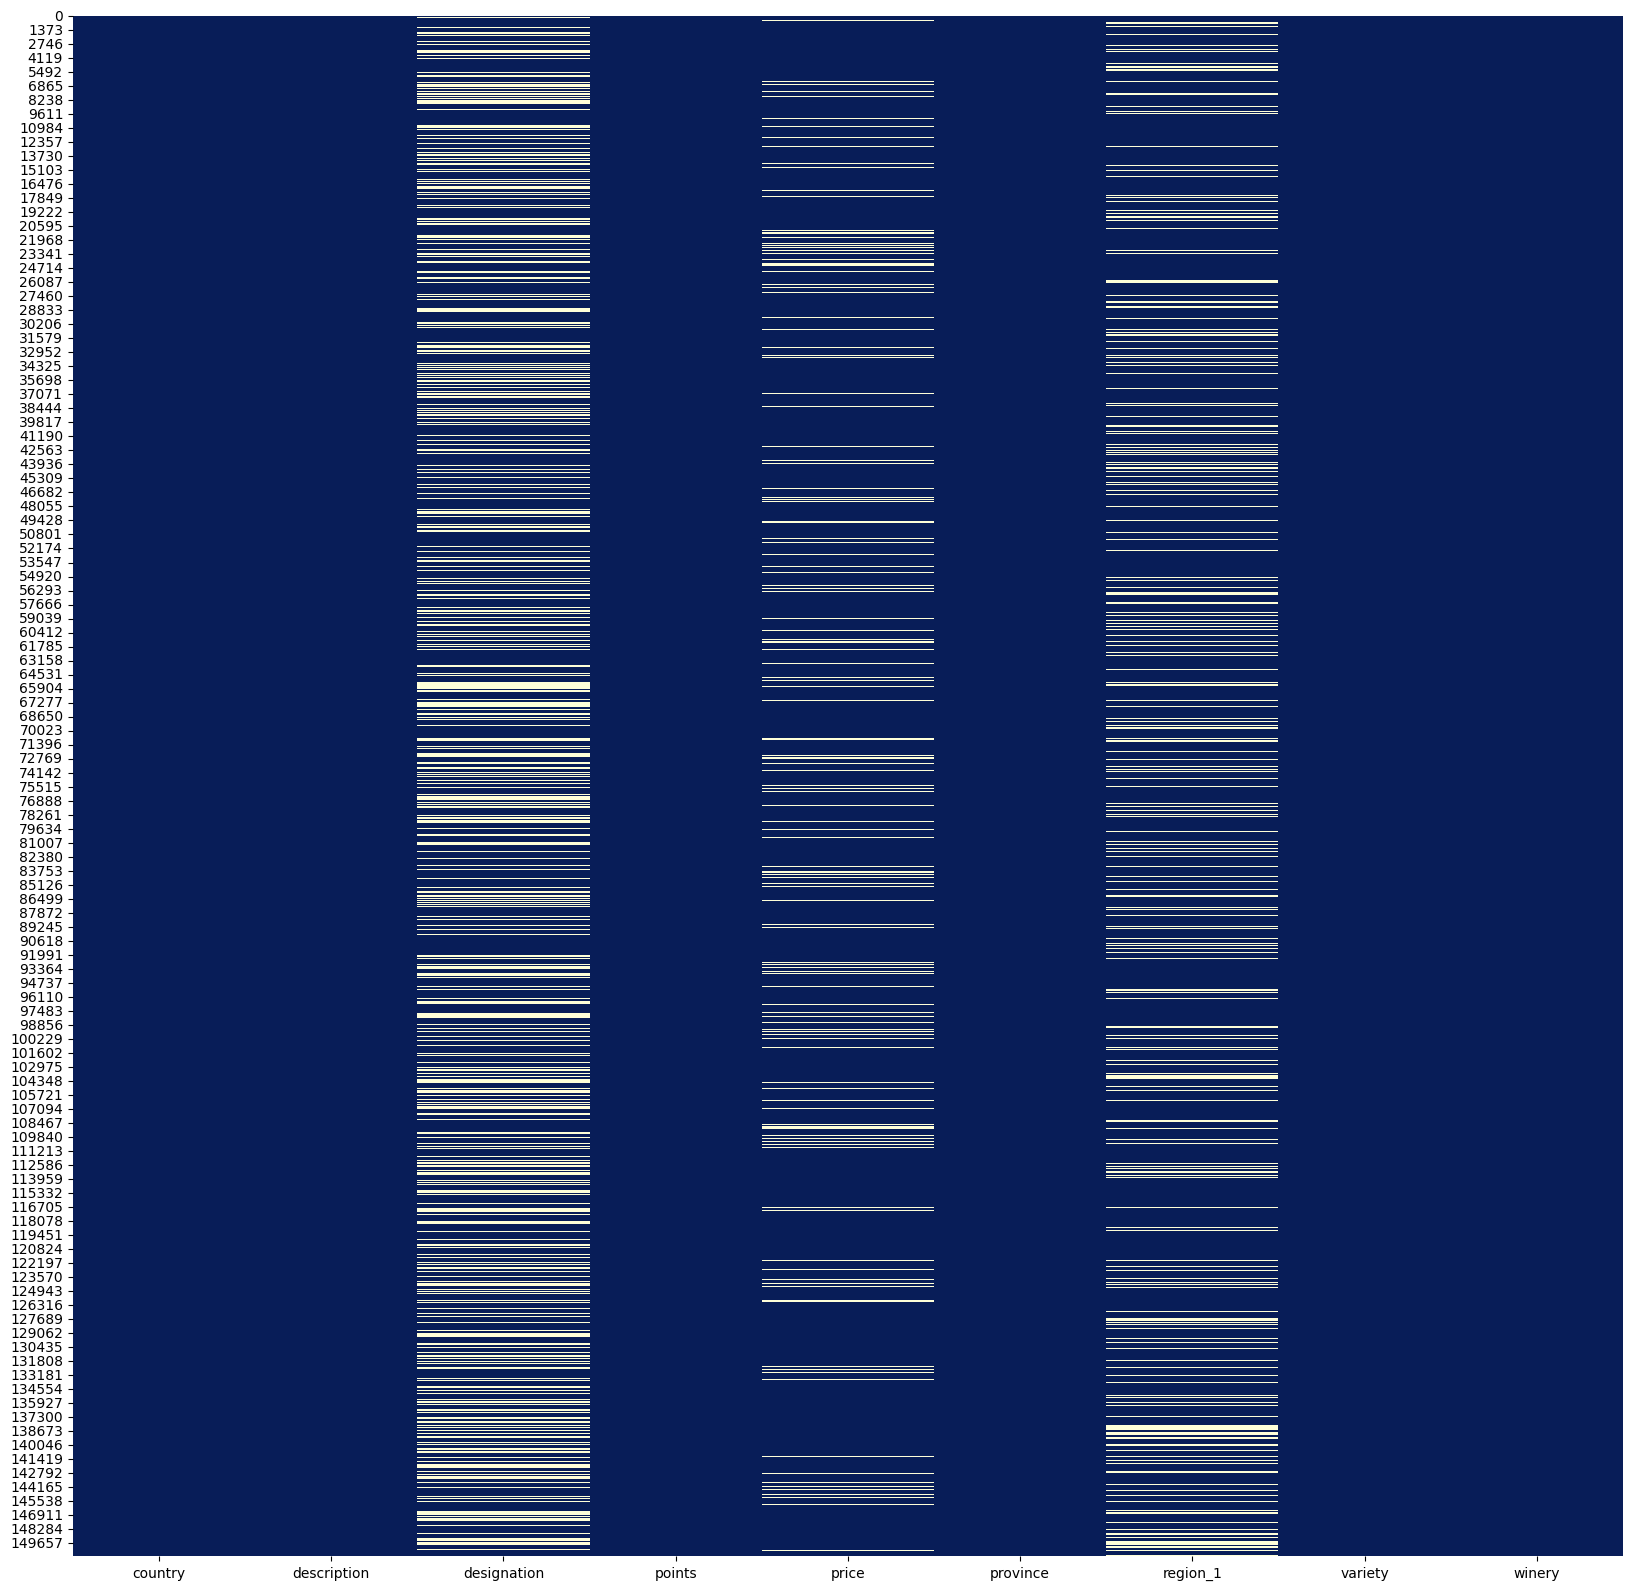

In [104]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

Удалим не нужные дубликаты если они есть

In [105]:
df_cop = df_cop.drop_duplicates()
df_cop.shape

(97851, 9)

In [106]:
df_cop[df_cop['price'].isna()]

,country,description,designation,points,price,province,region_1,variety,winery
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,Sangiovese,Abbadia Ardenga
56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,Sauvignon Blanc,Domaine Vacheron
72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,Nebbiolo,Silvano Bolmida
82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,Nebbiolo,Ceste
116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,Monastrell,Casa de la Ermita
...,...,...,...,...,...,...,...,...,...
149433,Australia,Penetrating eucalyptus aromas largely obscure ...,The Benefit,86,NaN,South Australia,Southern Flinders Ranges,Shiraz,Tim Adams
149454,Portugal,"This is very burnt, offering concentrated old ...",40-year old tawny,85,NaN,Port,NaN,Port,Casa Santa Eufemia
149526,Portugal,"A dry, fruity wine, burnt with acidity and som...",10-year old tawny,85,NaN,Port,NaN,Port,Quarles Harris
149610,Portugal,A sadly unbalanced wine from a company that ha...,10-year old tawny,84,NaN,Port,NaN,Port,Ferreira


In [107]:
df_cop.dropna().shape

(50231, 9)

<Axes: >

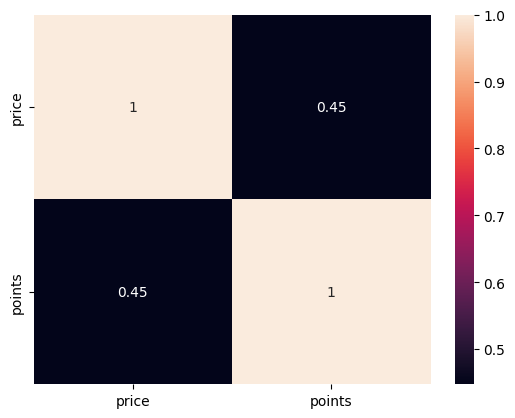

In [108]:
sns.heatmap(df_cop[['price','points']].corr(),annot = True)

Попробуем дополнить колонку price по среднему значению цены на значение points

Пока избавимся от выбросов

<Axes: >

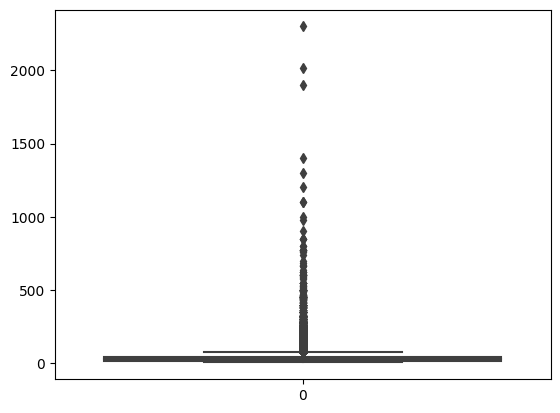

In [109]:
sns.boxplot(df_cop['price'])

<Axes: >

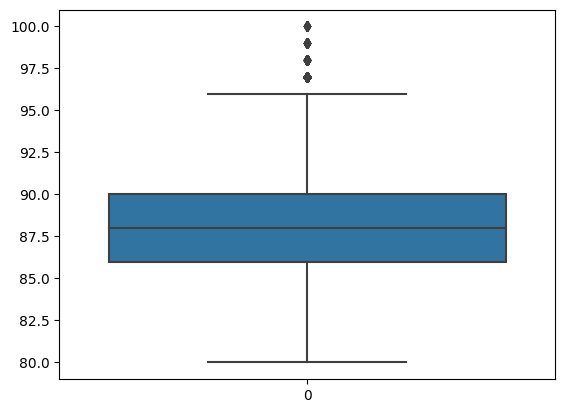

In [110]:
sns.boxplot(df_cop['points'])

In [111]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = work_val.quantile(0.25)#np.percentile(work_val, 25, method= 'midpoint')
    Q3 = work_val.quantile(0.75)#np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:
            
            up,low = quantiles(df[col])
            df = df[~(df[col] < low) & ~(df[col] > up)]

    return df.reset_index(drop=True)

In [112]:
df_cop = anti_emmi(df_cop)

<Axes: >

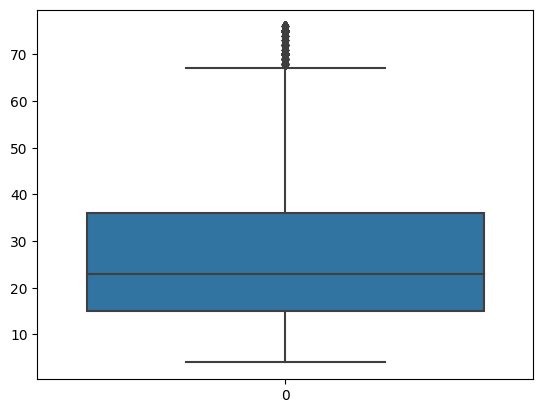

In [113]:
sns.boxplot(df_cop['price'])

<Axes: >

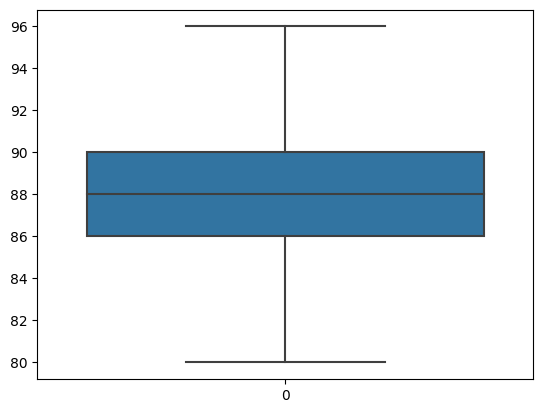

In [114]:
sns.boxplot(df_cop['points'])

In [115]:
df_cop

,country,description,designation,points,price,province,region_1,variety,winery
0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley Willamette Valley,Pinot Noir,Ponzi
1,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
2,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
3,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
4,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains Willamette Valley,Pinot Noir,Bergström
...,...,...,...,...,...,...,...,...,...
92608,US,A Syrah-Grenache blend that's dry and rustical...,Bungalow Red,84,15.0,California,Santa Barbara County Central Coast,Syrah-Grenache,Casa Barranca
92609,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,NaN,Port,NaN,Port,Casa Santa Eufemia
92610,US,"Outside of the vineyard, wines like this are w...",NaN,84,6.0,California,California California Other,Merlot,Delicato
92611,Argentina,"Heavy and basic, with melon and pineapple arom...",NaN,84,9.0,Mendoza Province,Uco Valley,Sauvignon Blanc,Finca El Portillo


Отображаем данные

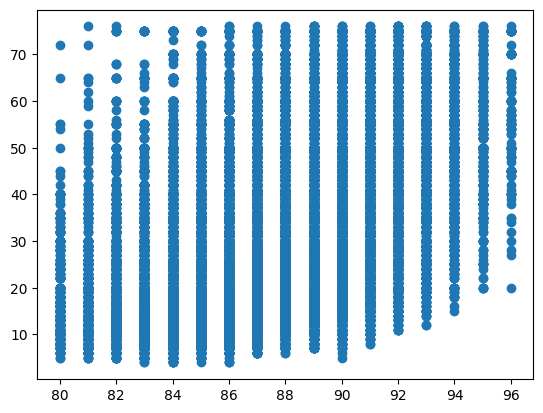

In [116]:
plt.scatter(df_cop["points"], df_cop['price'])

In [117]:
point = sorted(list(df_cop['points'].dropna().unique()))
print(f'Уникальные оценки: {point}')
print(f'Всего оценок: {len(point)}')

Уникальные оценки: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
Всего оценок: 17


In [118]:
def srednee_price(point):
    return df_cop.loc[df_cop['points'] == point,'price'].dropna().mean().round()

In [119]:
df_cop.loc[df_cop['price'].isna(),'price'] = df_cop.loc[df_cop['price'].isna(),'points'].apply(srednee_price)

<Axes: >

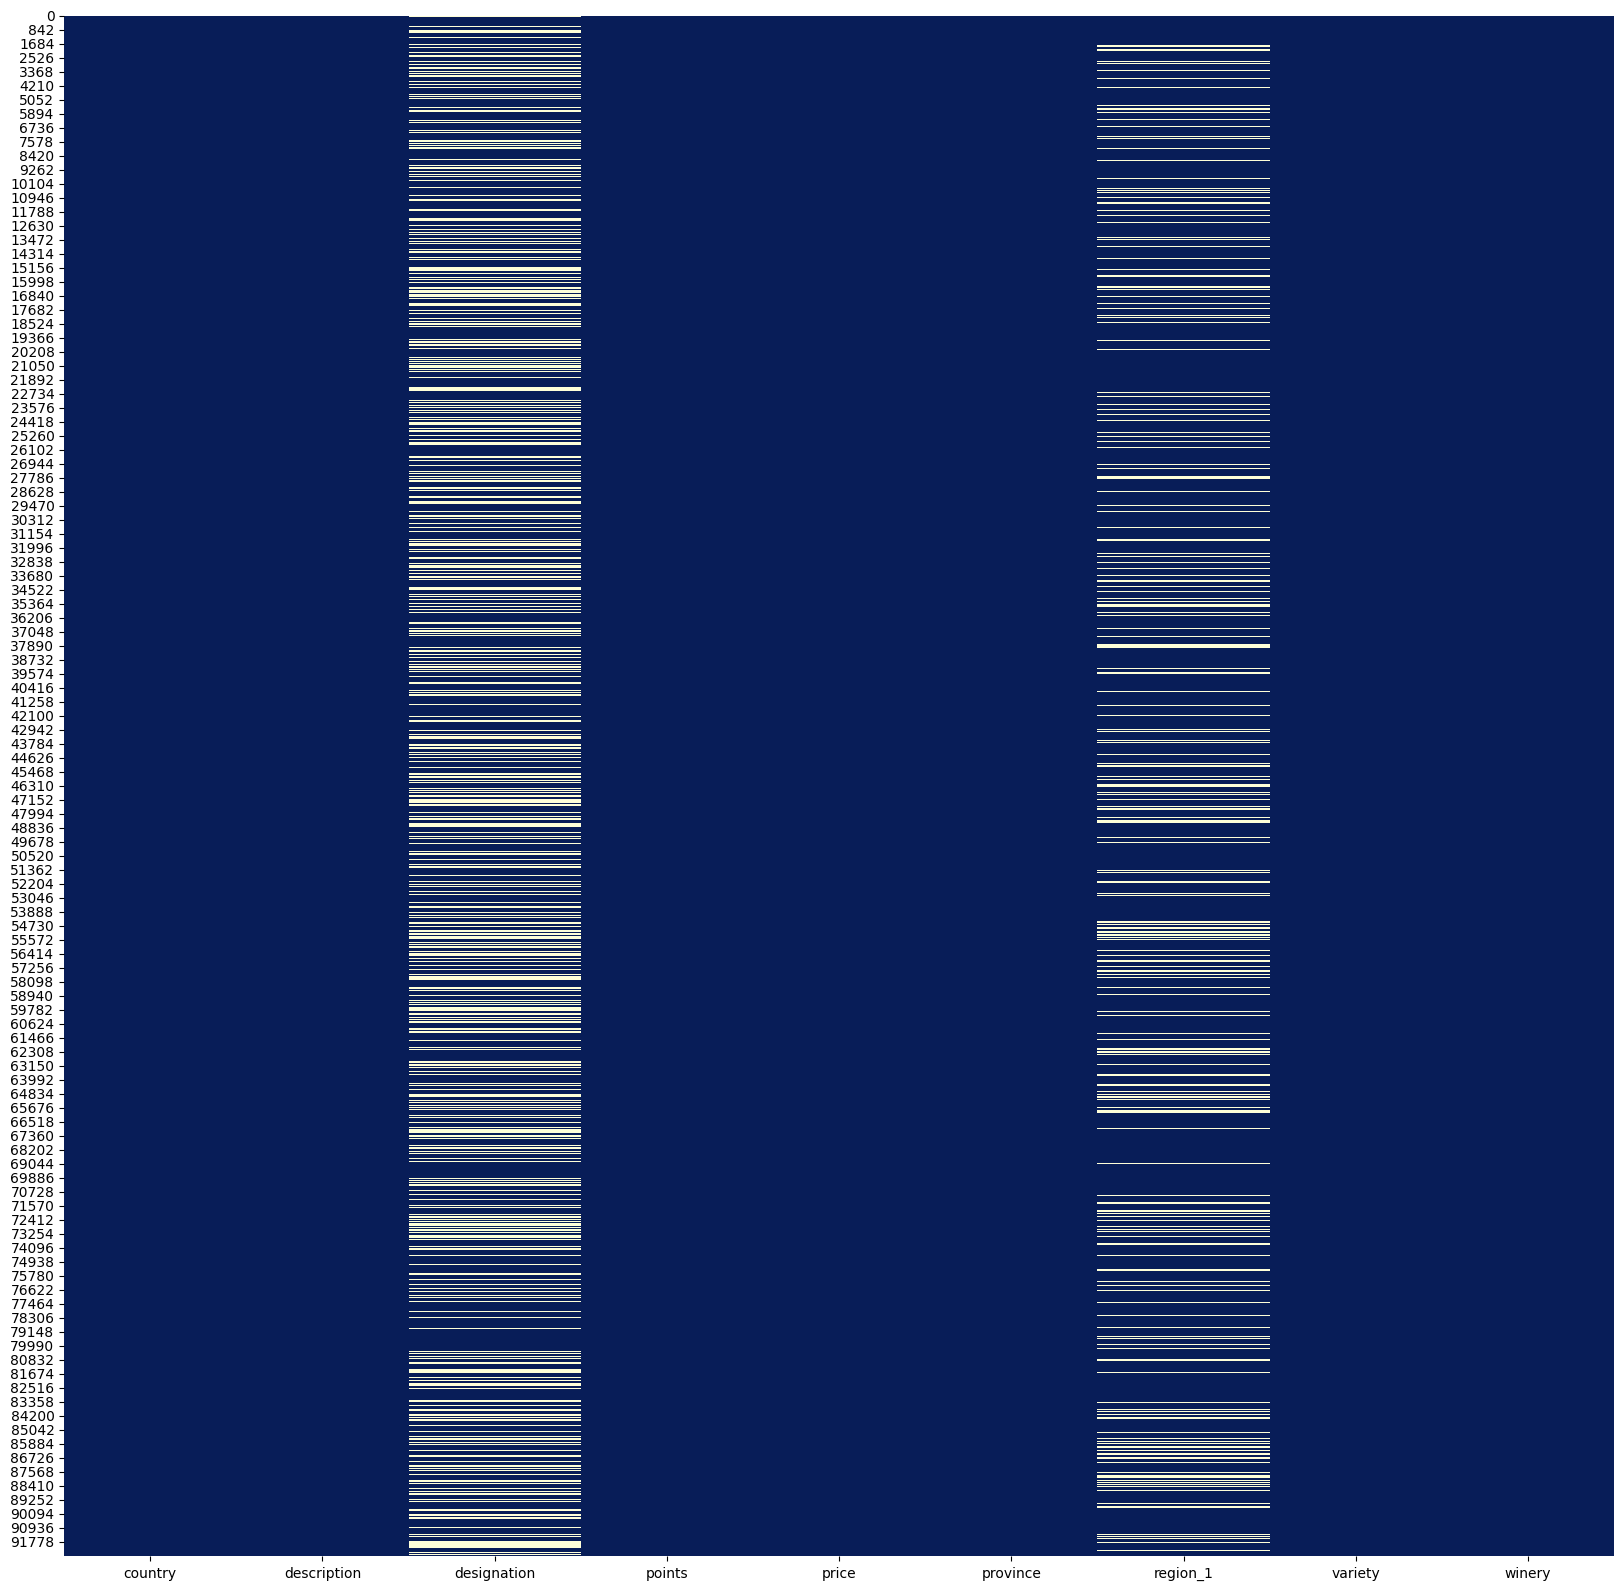

In [120]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

In [121]:
df_cop.dropna()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley Willamette Valley,Pinot Noir,Ponzi
1,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
2,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
3,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
4,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains Willamette Valley,Pinot Noir,Bergström
...,...,...,...,...,...,...,...,...,...
92597,Argentina,"Dark and dense, with extracted black cherry, l...",Organic,84,13.0,Mendoza Province,Tupungato,Malbec,Domaine Jean Bousquet
92601,France,Opens with spice aromas that seem a bit unusua...,Andlau,84,21.0,Alsace,Alsace,Riesling,Marc Kreydenweiss
92603,US,"Half Merlot, with the rest Cabernet Sauvignon,...",Five-O,84,25.0,New York,North Fork of Long Island Long Island,Red Blend,Martha Clara
92604,US,Tastes kind of soft and thick in jammy cherry ...,Crimson Creek,84,27.0,California,Napa Valley Napa,Merlot,Pine Ridge


In [122]:
df_cop[df_cop['region_1'].isna()]

,country,description,designation,points,price,province,region_1,variety,winery
12,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,Chardonnay,Kumeu River
16,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,Mavrud,Villa Melnik
27,US,This is an aromatic brooder with aromas of sco...,Private Reserve,90,55.0,Idaho,NaN,Petite Sirah,Huston
47,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,Portuguese Red,Herdade do Rocim
55,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,Portuguese Red,Adega Cooperativa de Borba
...,...,...,...,...,...,...,...,...,...
92579,Portugal,"It is the harshness, with unbalanced spirit, t...",20-year old tawny,85,50.0,Port,NaN,Port,Sandeman
92584,Portugal,A sadly unbalanced wine from a company that ha...,10-year old tawny,84,19.0,Port,NaN,Port,Ferreira
92593,Portugal,This is more like an Italian bitters than a Po...,30-year old tawny,84,60.0,Port,NaN,Port,Messias
92598,Portugal,"An easy, fresh, ripe style, with dried fruits ...",Presidential 20-year old tawny,84,50.0,Port,NaN,Port,C. da Silva


In [123]:
df_cop[df_cop['country'] =='Portugal']

,country,description,designation,points,price,province,region_1,variety,winery
47,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,Portuguese Red,Herdade do Rocim
55,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,Portuguese Red,Adega Cooperativa de Borba
69,Portugal,"The local Baga grape, better known for produci...",Marquês de Marialva Rosé Bruto,86,12.0,Beira Atlantico,NaN,Baga,Adega de Cantanhede
72,Portugal,This family-owned estate has produced an immed...,Muros de Vinha,86,10.0,Douro,NaN,Portuguese Red,Quinta do Portal
88,Portugal,This state-owned estate of forests and vineyar...,Companhia das Lezírias Herdade de Catapereiro ...,86,12.0,Tejo,NaN,Portuguese Red,Wines & Winemakers
...,...,...,...,...,...,...,...,...,...
92579,Portugal,"It is the harshness, with unbalanced spirit, t...",20-year old tawny,85,50.0,Port,NaN,Port,Sandeman
92584,Portugal,A sadly unbalanced wine from a company that ha...,10-year old tawny,84,19.0,Port,NaN,Port,Ferreira
92593,Portugal,This is more like an Italian bitters than a Po...,30-year old tawny,84,60.0,Port,NaN,Port,Messias
92598,Portugal,"An easy, fresh, ripe style, with dried fruits ...",Presidential 20-year old tawny,84,50.0,Port,NaN,Port,C. da Silva


In [124]:
df_cop[df_cop['country'] =='Portugal']['region_1'].isna().sum()

3376

Видим что все колонки Португалии - пусты, заполняем их единственным значением Portugal означающее для нас всю ту же португалию, но сохраняющее данные о винах этой страны при очистке nan значений в дальнейшем при работе с текстом удалим лишние повторения.

In [125]:
df_cop.loc[df_cop['country'] =='Portugal','region_1']  = 'Portugal'

Так делаем и с остальными странами:

In [126]:
df_cop[df_cop['region_1'].isna()]['country'].unique()

array(['New Zealand', 'Bulgaria', 'US', 'Israel', 'South Africa',
       'France', 'Greece', 'Chile', 'Morocco', 'Romania', 'Germany',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Argentina', 'Bosnia and Herzegovina',
       'Brazil', 'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea',
       'Ukraine', 'England', 'Mexico', 'Georgia', 'Montenegro',
       'Luxembourg', 'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia',
       'US-France'], dtype=object)

In [127]:
df_cop.loc[df_cop['region_1'].isna(),'region_1'] = df_cop.loc[df_cop.loc[df_cop['region_1'].isna(),'region_1'].index,'country']
df_cop

,country,description,designation,points,price,province,region_1,variety,winery
0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley Willamette Valley,Pinot Noir,Ponzi
1,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
2,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
3,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
4,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains Willamette Valley,Pinot Noir,Bergström
...,...,...,...,...,...,...,...,...,...
92608,US,A Syrah-Grenache blend that's dry and rustical...,Bungalow Red,84,15.0,California,Santa Barbara County Central Coast,Syrah-Grenache,Casa Barranca
92609,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,19.0,Port,Portugal,Port,Casa Santa Eufemia
92610,US,"Outside of the vineyard, wines like this are w...",NaN,84,6.0,California,California California Other,Merlot,Delicato
92611,Argentina,"Heavy and basic, with melon and pineapple arom...",NaN,84,9.0,Mendoza Province,Uco Valley,Sauvignon Blanc,Finca El Portillo


<Axes: >

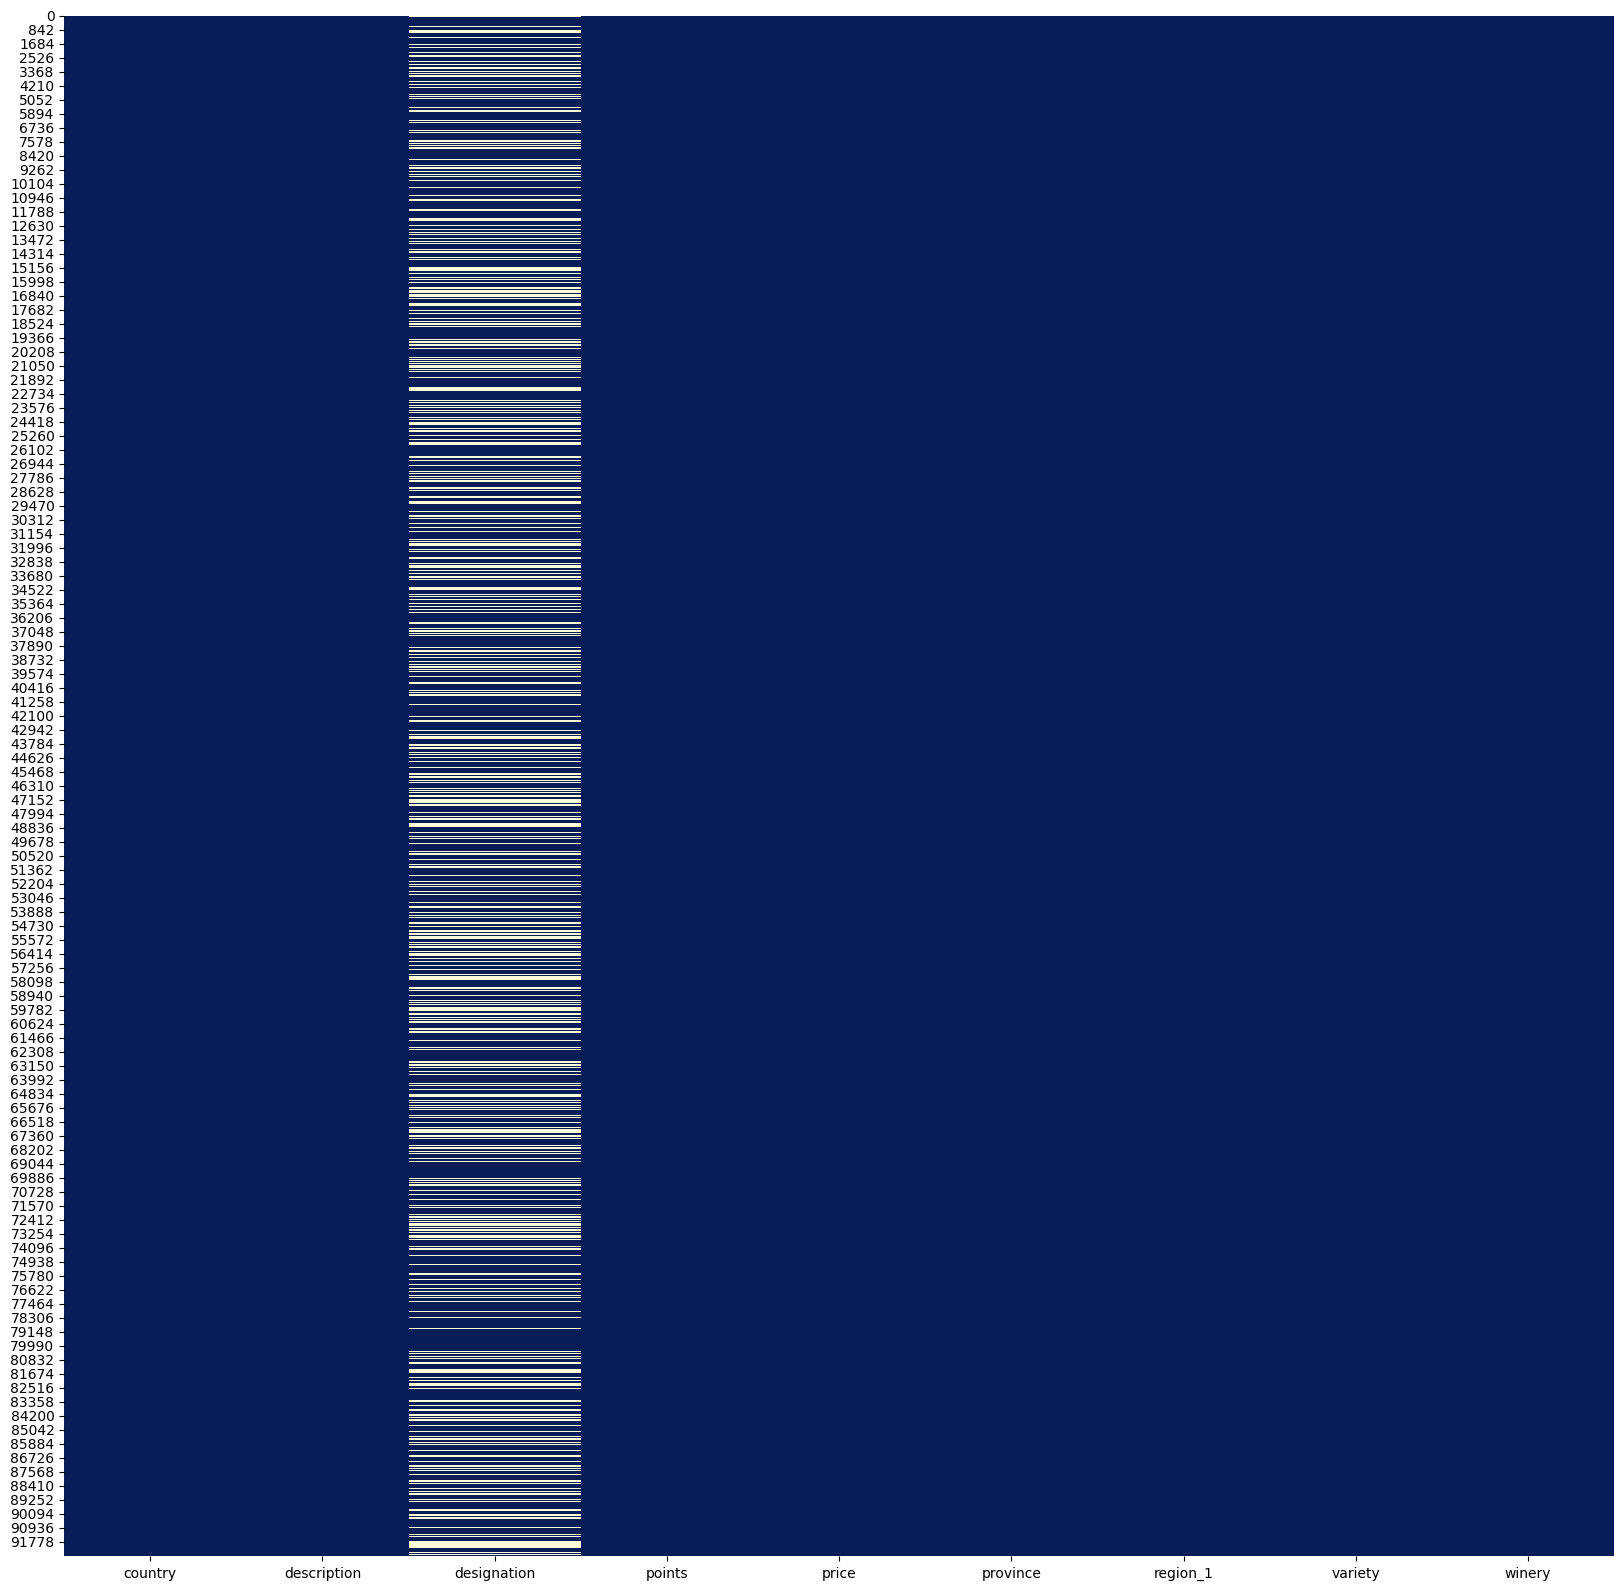

In [128]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

In [129]:
df_cop[df_cop['designation'].isna()].head(100)

,country,description,designation,points,price,province,region_1,variety,winery
21,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,Rhône-style White Blend,Clos de L'Oratoire des Papes
22,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,Sangiovese,Avignonesi
23,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,Sangiovese,Casina di Cornia
32,Italy,"Ripe dark-skinned berry, forest floor and cook...",NaN,90,50.0,Tuscany,Brunello di Montalcino,Sangiovese,Brunelli Martoccia
33,US,"The aromas of blue fruit, herbs and spice are ...",NaN,90,40.0,Washington,Red Mountain Columbia Valley,Cabernet Sauvignon,Canvasback
...,...,...,...,...,...,...,...,...,...
392,Italy,"Aromas suggest oak, vanilla, plum, espresso an...",NaN,87,60.0,Tuscany,Brunello di Montalcino,Sangiovese,Ferrero
396,US,There's a touch of barnyard on the nose of thi...,NaN,86,32.0,California,South Coast South Coast,Syrah,Hawk Watch Winery
399,US,Rose petal aromas and lychee flavors make this...,NaN,86,18.0,California,California California Other,Moscato,The Naked Grape
402,US,Dried cranberry and currant flavors with raisi...,NaN,86,34.0,California,Dry Creek Valley Sonoma,Aglianico,Orsi Family Vineyards


In [130]:
df_cop['designation'].value_counts()

Reserve            1650
Reserva            1116
Estate              984
Barrel sample       734
Barrel Sample       589
                   ... 
Voyage de Rouge       1
Fleurieux             1
El CabRhône           1
Pigmentum Rouge       1
Bungalow Red          1
Name: designation, Length: 28892, dtype: int64

Как видим индивидуальных значений у колонки designation слишком много и дополнить nan значение невозможно

Поэтому чистим строки с nan значениями по всему датасету

In [131]:
df_cop.dropna(inplace = True)
df_cop.reset_index(drop = True,inplace = True)
df_cop

,country,description,designation,points,price,province,region_1,variety,winery
0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley Willamette Valley,Pinot Noir,Ponzi
1,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
2,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
3,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
4,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains Willamette Valley,Pinot Noir,Bergström
...,...,...,...,...,...,...,...,...,...
63615,France,Opens with spice aromas that seem a bit unusua...,Andlau,84,21.0,Alsace,Alsace,Riesling,Marc Kreydenweiss
63616,US,"Half Merlot, with the rest Cabernet Sauvignon,...",Five-O,84,25.0,New York,North Fork of Long Island Long Island,Red Blend,Martha Clara
63617,US,Tastes kind of soft and thick in jammy cherry ...,Crimson Creek,84,27.0,California,Napa Valley Napa,Merlot,Pine Ridge
63618,US,A Syrah-Grenache blend that's dry and rustical...,Bungalow Red,84,15.0,California,Santa Barbara County Central Coast,Syrah-Grenache,Casa Barranca


<Axes: >

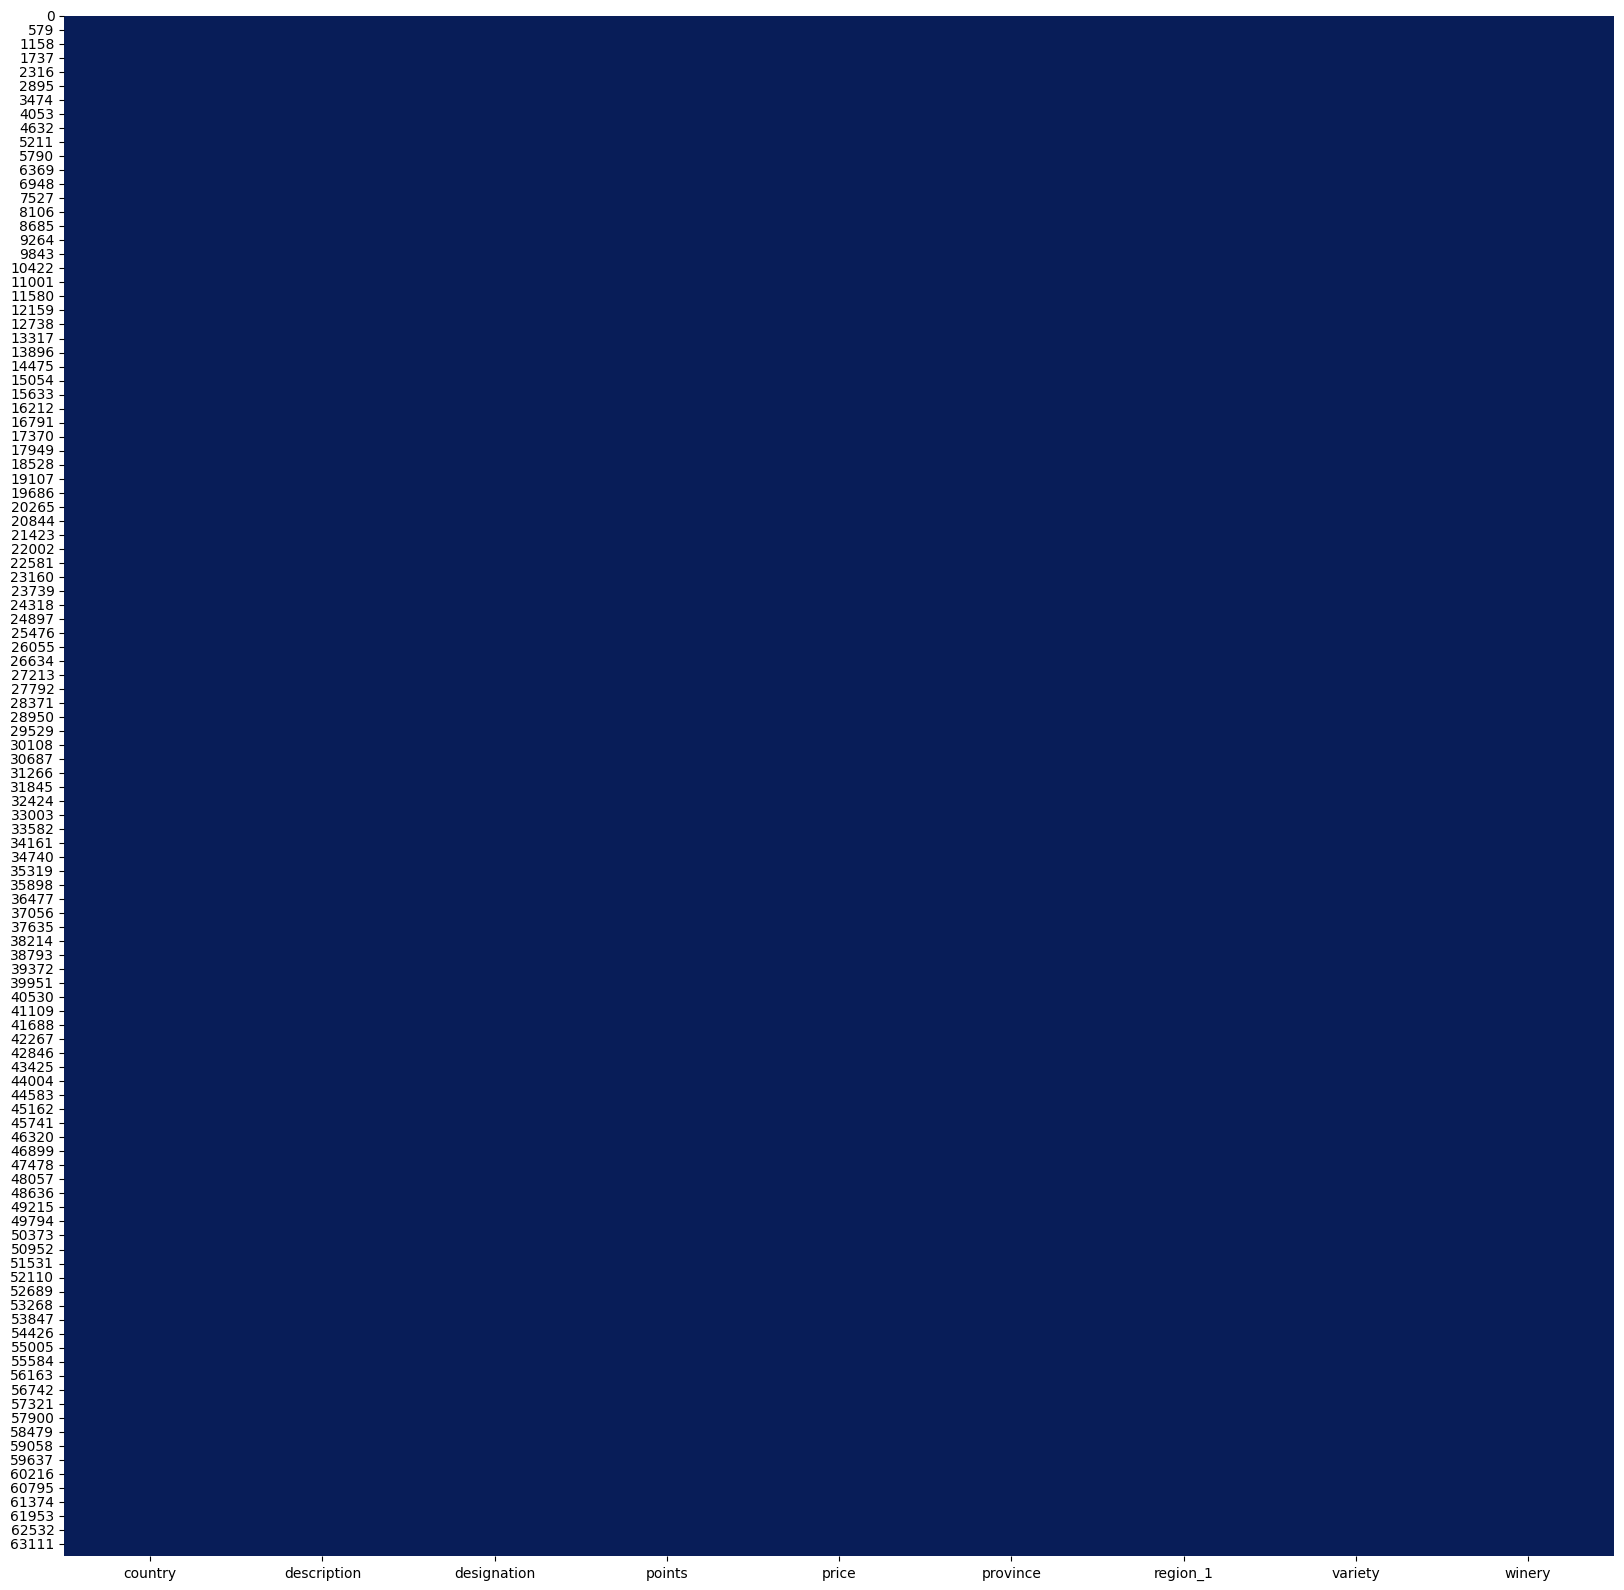

In [132]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

Переходим к обработке текстовых данных

Создадим одну ячейке со всеми строковыми данными на каждую строку данных

In [133]:
df_word = df_cop['description'] + ' ' + df_cop['designation'] + ' ' + df_cop['province'] + \
          ' ' + df_cop['variety'] + ' ' + df_cop['winery']
df_word

0        This spent 20 months in 30% new French oak, an...
1        This is the top wine from La Bégude, named aft...
2        Deep, dense and pure from the opening bell, th...
3        Slightly gritty black-fruit aromas include a s...
4        This re-named vineyard was formerly bottled as...
                               ...                        
63615    Opens with spice aromas that seem a bit unusua...
63616    Half Merlot, with the rest Cabernet Sauvignon,...
63617    Tastes kind of soft and thick in jammy cherry ...
63618    A Syrah-Grenache blend that's dry and rustical...
63619    Oreo eaters will enjoy the aromas of this wine...
Length: 63620, dtype: object

Я решил объединить country и region_1 т.к. в region_1 присутствуют искусственные данные добавленные мной, поэтому я хочу преобразовать их отдельно и убрать в них повторения созданные моим исправлением nan значений

In [134]:
df_plac = df_cop['country'] + ' ' + df_cop['region_1']
df_plac

0          US Willamette Valley Willamette Valley
1                                   France Bandol
2                                      Spain Toro
3                                      Spain Toro
4         US Chehalem Mountains Willamette Valley
                           ...                   
63615                               France Alsace
63616    US North Fork of Long Island Long Island
63617                         US Napa Valley Napa
63618       US Santa Barbara County Central Coast
63619                           Portugal Portugal
Length: 63620, dtype: object

In [135]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    #if len(tokens) > 2:
    return tokens
    #return None

In [136]:
df_plac = df_plac.apply(lemmatize)
df_plac = df_plac.apply(set)
df_plac = df_plac.apply(list)
df_plac

0                             [willamette, valley, us]
1                                     [france, bandol]
2                                        [toro, spain]
3                                        [toro, spain]
4        [mountains, chehalem, willamette, us, valley]
                             ...                      
63615                                 [alsace, france]
63616              [long, fork, island, of, us, north]
63617                               [napa, valley, us]
63618     [central, barbara, county, santa, us, coast]
63619                                       [portugal]
Length: 63620, dtype: object

In [137]:
df_word = df_word.apply(lemmatize)
df_word = df_word.dropna()
df_word

0        [this, spent, months, in, new, french, oak, an...
1        [this, is, the, top, wine, from, la, bégude, n...
2        [deep, dense, and, pure, from, the, opening, b...
3        [slightly, gritty, black, fruit, aromas, inclu...
4        [this, re, named, vineyard, was, formerly, bot...
                               ...                        
63615    [opens, with, spice, aromas, that, seem, a, bi...
63616    [half, merlot, with, the, rest, cabernet, sauv...
63617    [tastes, kind, of, soft, and, thick, in, jammy...
63618    [a, syrah, grenache, blend, that, s, dry, and,...
63619    [oreo, eaters, will, enjoy, the, aromas, of, t...
Length: 63620, dtype: object

In [138]:
df_tokens = df_plac + df_word

In [139]:
df_tokens.dropna()
df_tokens

0        [willamette, valley, us, this, spent, months, ...
1        [france, bandol, this, is, the, top, wine, fro...
2        [toro, spain, deep, dense, and, pure, from, th...
3        [toro, spain, slightly, gritty, black, fruit, ...
4        [mountains, chehalem, willamette, us, valley, ...
                               ...                        
63615    [alsace, france, opens, with, spice, aromas, t...
63616    [long, fork, island, of, us, north, half, merl...
63617    [napa, valley, us, tastes, kind, of, soft, and...
63618    [central, barbara, county, santa, us, coast, a...
63619    [portugal, oreo, eaters, will, enjoy, the, aro...
Length: 63620, dtype: object

In [140]:
from collections import defaultdict
word_freq = defaultdict(int)
for tokens in df_tokens.iloc[:]:
    for token in tokens:
        word_freq[token] += 1

Отобразим самые часто встречающиеся слова

In [141]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10] 

['and', 'the', 'a', 'of', 'with', 'this', 'is', 'it', 'wine', 's']

Как видим они не самые информативные и в большей степени являются предлогами

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_cop['description'])
X_counts.shape


(63620, 26283)

In [143]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_counts)
X_tfidf = tf_transformer.transform(X_counts)
X_tfidf.shape

(63620, 26283)

In [144]:
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(2000)
Xpca = clf.fit_transform(X_tfidf)
Xpca

array([[ 2.22391385e-01, -3.91276681e-02, -1.27364434e-01, ...,
        -6.50012629e-03,  6.09151494e-03, -6.54799194e-03],
       [ 2.39609736e-01,  1.61301799e-01,  1.84848879e-02, ...,
        -3.32067689e-03, -6.49095212e-03,  4.23188891e-03],
       [ 2.53624831e-01, -6.79260126e-02, -7.06963823e-02, ...,
        -1.04646505e-02,  1.84701467e-02, -1.71267131e-02],
       ...,
       [ 2.91813186e-01, -7.13798062e-03, -6.35646447e-02, ...,
        -1.59823566e-03, -8.88899066e-03,  1.61528798e-02],
       [ 1.86922320e-01,  3.57529411e-03, -7.42341825e-02, ...,
         1.00773110e-02,  2.68363323e-04, -2.35718029e-02],
       [ 1.63788837e-01,  5.81018708e-02, -1.95424076e-02, ...,
        -7.79120453e-04,  4.87481018e-03, -7.23494485e-03]])

In [145]:
Xpca.shape

(63620, 2000)

In [146]:
df_cop['price'].shape

(63620,)

In [147]:
X = np.append(Xpca, np.expand_dims(df_cop['price'], axis=1), axis=1)
y = df_cop['points']
print(X)
y

[[ 2.22391385e-01 -3.91276681e-02 -1.27364434e-01 ...  6.09151494e-03
  -6.54799194e-03  6.50000000e+01]
 [ 2.39609736e-01  1.61301799e-01  1.84848879e-02 ... -6.49095212e-03
   4.23188891e-03  6.60000000e+01]
 [ 2.53624831e-01 -6.79260126e-02 -7.06963823e-02 ...  1.84701467e-02
  -1.71267131e-02  7.30000000e+01]
 ...
 [ 2.91813186e-01 -7.13798062e-03 -6.35646447e-02 ... -8.88899066e-03
   1.61528798e-02  2.70000000e+01]
 [ 1.86922320e-01  3.57529411e-03 -7.42341825e-02 ...  2.68363323e-04
  -2.35718029e-02  1.50000000e+01]
 [ 1.63788837e-01  5.81018708e-02 -1.95424076e-02 ...  4.87481018e-03
  -7.23494485e-03  1.90000000e+01]]


0        96
1        95
2        95
3        95
4        95
         ..
63615    84
63616    84
63617    84
63618    84
63619    84
Name: points, Length: 63620, dtype: int64

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.47762349, 0.38933202, 0.24365639, ..., 0.53544649, 0.43323771,
        0.84722222],
       [0.51460284, 0.72141679, 0.47733329, ..., 0.43684081, 0.53134704,
        0.86111111],
       [0.54470265, 0.34161702, 0.33444882, ..., 0.63245476, 0.33695916,
        0.95833333],
       ...,
       [0.62671867, 0.44233465, 0.34587515, ..., 0.41804798, 0.63984179,
        0.31944444],
       [0.40144761, 0.46008511, 0.32878063, ..., 0.48981189, 0.27830141,
        0.15277778],
       [0.35176451, 0.55042834, 0.41640671, ..., 0.52591147, 0.42698564,
        0.20833333]])

In [149]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

          80       0.00      0.00      0.00       114
          81       0.00      0.00      0.00       166
          82       0.00      0.00      0.00       463
          83       0.00      0.00      0.00       710
          84       0.00      0.00      0.00      1373
          85       0.00      0.00      0.00      1619
          86       0.00      0.00      0.00      2056
          87       0.15      0.96      0.25      2755
          88       0.24      0.02      0.03      2566
          89       0.00      0.00      0.00      1970
          90       0.15      0.17      0.16      2484
          91       0.00      0.00      0.00      1713
          92       0.00      0.00      0.00      1442
          93       0.00      0.00      0.00       895
          94       0.00      0.00      0.00       441
          95       0.00      0.00      0.00       174
          96       0.00      0.00      0.00        54

    accuracy              

In [86]:
import gensim
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
from gensim import models
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)
w2v_model.build_vocab(df_tokens)

In [87]:
w2v_model.train(df_tokens, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(37092293, 98139420)

In [90]:
w2v_model.wv.most_similar(positive=["blend"])

[('red', 0.7278865575790405),
 ('style', 0.6927239894866943),
 ('besse', 0.6530976891517639),
 ('sauvignon', 0.6522788405418396),
 ('bordeaux', 0.6258725523948669),
 ('lagravière', 0.6138713955879211),
 ('white', 0.6137794256210327),
 ('mambo', 0.6127829551696777),
 ('merlot', 0.6125563383102417),
 ('baltà', 0.6020795702934265)]

In [96]:
w2v_model.wv